In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata
import datetime
import numpy as np
import matplotlib.dates as mdates
import data_processing as dp

In [136]:
"""
plot
Plots data with 7 day average

data: dataframe time series with column 'date' and data in 1st column
plot_color: Color to use for plot
label: string of plot label
rolling: Boolean, True to overlay 7-day average
"""
def plot(data, ax=None, plot_color="blue", label="", rolling=True):
    ax = ax or plt.gca()
    x, y0 = data.date, data.iloc[:,1]
    if(rolling):
        y1 = data.iloc[:,1].rolling(7).mean()
        ax.plot(x, y0, alpha=.3, color=plot_color)
        ax.plot(x, y1, color=plot_color)
        ax.fill_between(x, y1, 0, facecolor=plot_color, color=plot_color, alpha=0.2)
    else:
        ax.plot(x, y0, color=plot_color)
        ax.fill_between(x, y0, 0, facecolor=plot_color, color=plot_color, alpha=0.2)
    ax.title.set_text(label)
    fig.autofmt_xdate()
    return ax




/Users/jfleishhacker/GitHub/covid-twitter-bot/data_processing.py:194: RuntimeWarning: invalid value encountered in float_scalars
  test_positivity = pos_sum / (pos_sum + neg_sum) * 100


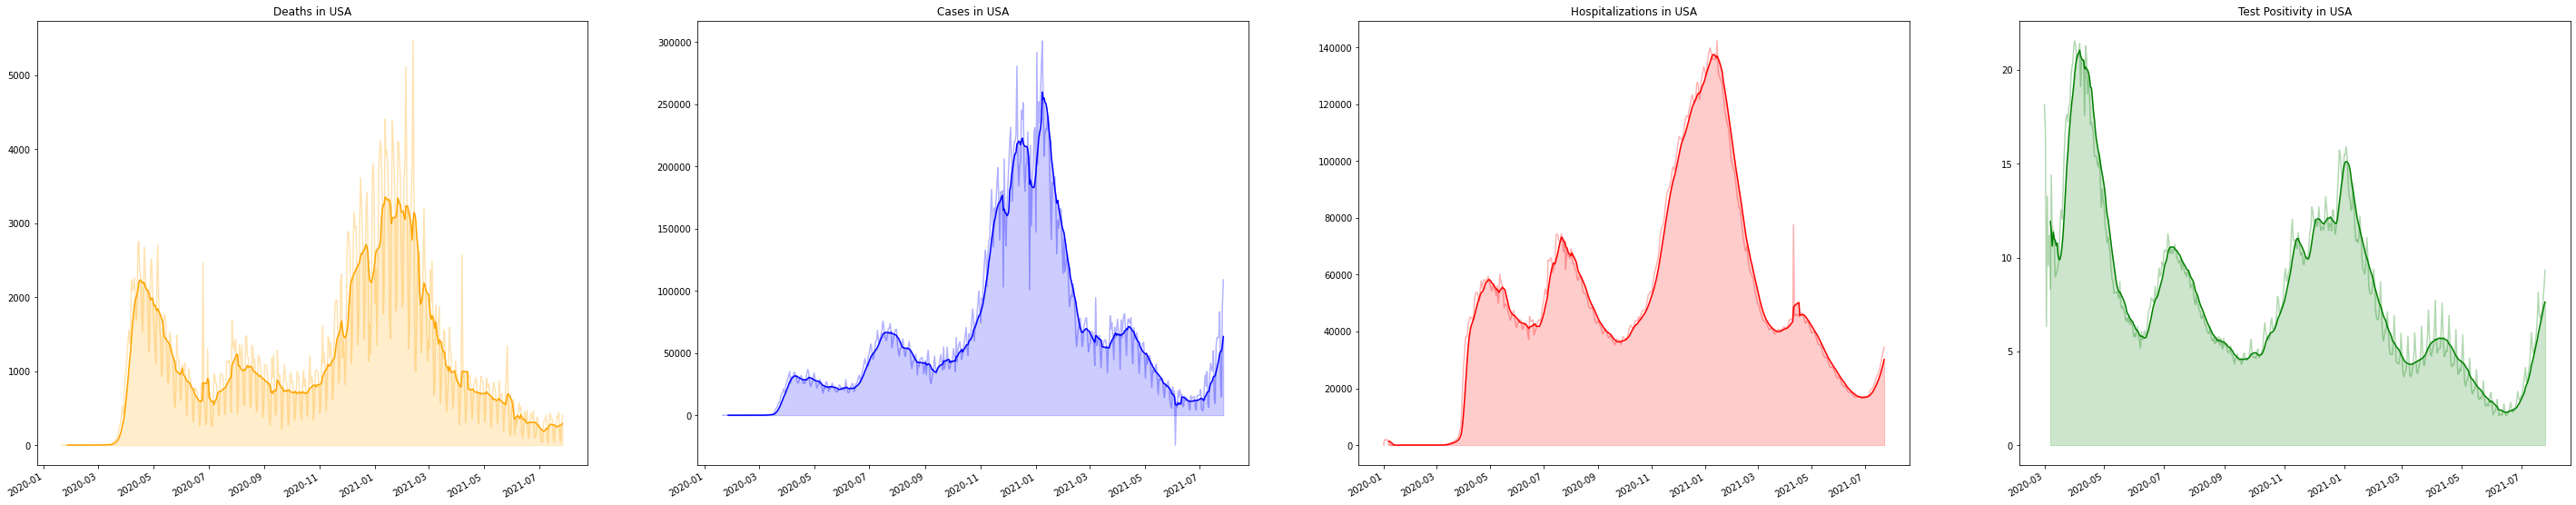

In [143]:
us_pos = dp.get_us_positivity()
us_case = dp.get_us_cases()
us_death = dp.get_us_deaths()
us_hosp = dp.get_us_hospitalizations()

fig, axs = plt.subplots(1,4, figsize=(50,10))

plot(us_death, axs[0], plot_color="orange", label='Deaths in USA')
plot(us_case, axs[1], plot_color="blue", label='Cases in USA')
plot(us_hosp, axs[2], plot_color="red", label='Hospitalizations in USA')
plot(us_pos, axs[3], plot_color="green", label='Test Positivity in USA')
plt.show()
# plot(us_pos, "red", "Test positivity in USA")
# plot(us_death, "green", "Deaths in USA")
# plot(us_hosp, "orange", "Hospitalizations in USA", False)

TODO:

-Add 4 part plot
-Make it so all 4 visualizations can be initialized with one function call